In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [ ]:
## you may skip this part. dataframe is saved as excel

In [2]:
ticket = pd.read_csv("full maintenance.csv")
ticket.columns = pd.Series(ticket.columns).str.strip()

data = pd.concat(pd.read_excel("full data.xlsx", sheet_name=None), ignore_index=True)
data.columns = ['TermID', 'MS VENDOR', 'Operation Hours', 'Fault', 'Start', 'End', 'Duration']

In [3]:
data["Start"] = pd.to_datetime(data["Start"].str.strip(), format = '%m/%d/%Y %I:%M:%S %p')
data["End"] = pd.to_datetime(data["End"].str.strip(), format = '%m/%d/%Y %I:%M:%S %p')

ticket["Ticket start"] = pd.to_datetime(ticket["Ticket start"].str.strip(), format = '%d-%m-%Y %H:%M:%S')
ticket["Ticket stop"] = pd.to_datetime(ticket["Ticket stop"].str.strip(), format = '%d-%m-%Y %H:%M:%S')

data = data.sort_values(by = ["Start"], ignore_index = True)
ticket = ticket.sort_values(by = ["Ticket start"], ignore_index = True)

In [4]:
atm_list = list(ticket["ATM ID"].unique())

In [5]:
month_end = dt.datetime(2020, 11, 30, 0, 0, 0)
full_list = []
for name in atm_list:
    weekly_count = []
    week_start = dt.datetime(2020, 8, 1, 0, 0, 0)
    week_end = week_start + dt.timedelta(days = 7)
    s = ticket[ticket["ATM ID"] == name]
    while week_end <= month_end:
        s1 = s[s["Ticket start"] >= week_start]
        s1 = s1[s1["Ticket start"] < week_end]
        weekly_count.append(s1.shape[0])
        week_start = week_end
        week_end = week_start + dt.timedelta(days = 7)
    if week_end > month_end:
        s1 = s[s["Ticket start"] >= week_start]
        s1 = s1[s1["Ticket start"] < month_end]
        weekly_count.append(s1.shape[0])
    #print(weekly_count)
    full_list.append(weekly_count)

In [74]:
count = pd.DataFrame(full_list)
count.index = atm_list
count.columns = ["week {}".format(i+1) for i in range(count.shape[1])]
count
count.to_csv("Ticket count.csv")

In [75]:
count = pd.read_csv("ticket count.csv")
count = count.rename(columns = {count.columns[0]: "ATM ID"})
count = count.set_index("ATM ID")
count

,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,week 11,week 12,week 13,week 14,week 15,week 16,week 17,week 18
ATM ID,,,,,,,,,,,,,,,,,,
1RDDJAI26,2,3,0,5,4,2,1,0,0,0,0,0,0,0,0,3,1,0
1FNJNP09,4,2,1,7,5,1,4,2,1,0,3,1,0,0,1,0,1,0
1FNMAU06,1,0,0,0,2,1,1,2,3,6,3,0,3,12,8,7,2,0
1FNKAN98,4,0,1,1,1,3,3,4,3,2,3,7,3,3,5,2,4,1
1FDJDP44,4,0,2,3,3,1,2,1,0,2,3,3,2,6,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1FNBHL07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0
1FNUTT02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0
1RDNMUM55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0


In [39]:
count["Weekly Avg Ticket"] = round(count.mean(axis = 1),3)
count

,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,week 11,week 12,week 13,week 14,week 15,week 16,week 17,week 18,Weekly Avg Ticket
ATM ID,,,,,,,,,,,,,,,,,,,
1RDDJAI26,2,3,0,5,4,2,1,0,0,0,0,0,0,0,0,3,1,0,1.167
1FNJNP09,4,2,1,7,5,1,4,2,1,0,3,1,0,0,1,0,1,0,1.833
1FNMAU06,1,0,0,0,2,1,1,2,3,6,3,0,3,12,8,7,2,0,2.833
1FNKAN98,4,0,1,1,1,3,3,4,3,2,3,7,3,3,5,2,4,1,2.778
1FDJDP44,4,0,2,3,3,1,2,1,0,2,3,3,2,6,6,1,2,0,2.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1FNBHL07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0.333
1FNUTT02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0.167
1RDNMUM55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0.222


In [27]:
hits = pd.concat(pd.read_excel("hits.xlsx", sheet_name = None), ignore_index = True)
hits = hits.rename(columns = {"Entity Name":"ATM ID", "MACHIN TYPE":"MACHINE", "SITE TYPE":"SITE"})
hits = hits[["ATM ID","MACHINE", "SITE","REGION", "ZONE", "BRANCH_ALPHA","Site Category","SUM"]]
hits = hits.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
hits = hits.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
hits

,ATM ID,MACHINE,SITE,REGION,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MMSR,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,JUNAGADH REGION,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,BHAVNAGAR REGION,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,KHEDA REGION,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,ANAND REGION,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3
...,...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD - II REGION,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,3127
16473,5DEN17561,OPEX(DENA),OFFSITE,JUNAGADH REGION,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,1533
16474,5DEN18771,OPEX(DENA),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,800
16475,5DEN18801,OPEX(DENA),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBKALY,SITE NOT UNDER SPECIAL CATEGORY,592


In [28]:
g = hits.groupby("ATM ID")
atm_list = g.sum().index
for name in atm_list:
    print(g.get_group(name))
    
## Region does not seem relevant since for ATMs with same id, regions are varying in some cases

           MACHINE    SITE                     REGION         ZONE  \
0      CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
4212   CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
8324   CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   
12390  CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category  SUM  
0           DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  625  
4212        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  808  
8324        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  986  
12390       DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  954  
           MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
1      CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
4213   CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
8325   CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       DBAMRE   
12391  CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE 

           MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
49     CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
4259   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
8369   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
12433  CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   

                         Site Category   SUM  
49     SITE NOT UNDER SPECIAL CATEGORY  2379  
4259   SITE NOT UNDER SPECIAL CATEGORY  3200  
8369   SITE NOT UNDER SPECIAL CATEGORY  2011  
12433  SITE NOT UNDER SPECIAL CATEGORY  2730  
           MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
50     CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKANO   
8370   CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKANO   
12434  CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKANO   

                         Site Category 

           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
85     CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBSONA   
4297   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBSONA   
8406   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBSONA   
12469  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBSONA   

                         Site Category   SUM  
85     SITE NOT UNDER SPECIAL CATEGORY  1057  
4297   SITE NOT UNDER SPECIAL CATEGORY  1973  
8406   SITE NOT UNDER SPECIAL CATEGORY  2413  
12469  SITE NOT UNDER SPECIAL CATEGORY  2189  
        MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
86  CAPEX(DENA)  ONSITE  ANAND REGION  AHMEDABAD ZONE       DBVALV   

                      Site Category  SUM  
86  SITE NOT UNDER SPECIAL CATEGORY    6  
          MACHINE     SITE                    REGION         ZONE  \
87    CAPEX(DENA)  OFFSITE                      MMER  MUMBAI ZONE   
4298

           MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
124    CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBGUND   
4337   CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBGUND   
8446   CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBGUND   
12505  CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBGUND   

                         Site Category  SUM  
124    SITE NOT UNDER SPECIAL CATEGORY  407  
4337   SITE NOT UNDER SPECIAL CATEGORY  307  
8446   SITE NOT UNDER SPECIAL CATEGORY  332  
12505  SITE NOT UNDER SPECIAL CATEGORY  293  
           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
125    CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBNIKO   
4338   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBNIKO   
8447   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBNIKO   
12506  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBNIKO   

                         Sit

           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
169    CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMOYA   
8490   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMOYA   
12548  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMOYA   

                         Site Category  SUM  
169    SITE NOT UNDER SPECIAL CATEGORY  142  
8490   SITE NOT UNDER SPECIAL CATEGORY  198  
12548  SITE NOT UNDER SPECIAL CATEGORY  871  
           MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
170    CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBPRAG   
4381   CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBPRAG   
8491   CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBPRAG   
12549  CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBPRAG   

                         Site Category   SUM  
170    SITE NOT UNDER SPECIAL CATEGORY  2574  

           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
222    CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
4431   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
8541   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
12600  CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   

                         Site Category   SUM  
222    SITE NOT UNDER SPECIAL CATEGORY  2747  
4431   SITE NOT UNDER SPECIAL CATEGORY  2026  
8541   SITE NOT UNDER SPECIAL CATEGORY  1196  
12600  SITE NOT UNDER SPECIAL CATEGORY  2005  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
223    CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
4432   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
8542   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBKUNO   
12601  CAPEX(DENA)  OFFSITE  SABARKANTHA REG

12648  SITE NOT UNDER SPECIAL CATEGORY  1455  
           MACHINE    SITE                 REGION            ZONE  \
273    CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
4481   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8592   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12649  CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
273         DBVAST  SITE NOT UNDER SPECIAL CATEGORY  2680  
4481        DBVAST  SITE NOT UNDER SPECIAL CATEGORY  2785  
8592        DBVAST  SITE NOT UNDER SPECIAL CATEGORY  2985  
12649       DBVAST  SITE NOT UNDER SPECIAL CATEGORY  3532  
          MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
4482  CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBBHNR   

                        Site Category  SUM  
4482  SITE NOT UNDER SPECIAL CATEGORY    3  
           MACHINE SITE       REGION         ZONE BRANCH_ALPHA  \
12650  CAPEX(D

      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
314     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       SNAGAR   
4523    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       SNAGAR   
8632    CAPEX  OFFSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       SNAGAR   
12691   CAPEX  OFFSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       SNAGAR   

                         Site Category   SUM  
314    SITE NOT UNDER SPECIAL CATEGORY  3597  
4523   SITE NOT UNDER SPECIAL CATEGORY  3491  
8632   SITE NOT UNDER SPECIAL CATEGORY  3872  
12691  SITE NOT UNDER SPECIAL CATEGORY  3404  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
315     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       RAMAHM   
4524    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       RAMAHM   
12692   CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       RAMAHM   

                         Site Category  SUM  
315    SITE NOT

      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
371     CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
4573    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
8681    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
12743   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   

                         Site Category   SUM  
371    SITE NOT UNDER SPECIAL CATEGORY  3796  
4573   SITE NOT UNDER SPECIAL CATEGORY  3576  
8681   SITE NOT UNDER SPECIAL CATEGORY  2928  
12743  SITE NOT UNDER SPECIAL CATEGORY  2226  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
372     CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SUBBHI   
4574    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SUBBHI   
8682    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SUBBHI   
12744   CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SUBBHI   

                         Site Category   SUM  
372    SITE NOT UNDER SPECIAL C

      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
415     CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       CPTANK   
4611    CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       CPTANK   
8716    CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       CPTANK   
12775   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       CPTANK   

                         Site Category  SUM  
415    SITE NOT UNDER SPECIAL CATEGORY  403  
4611   SITE NOT UNDER SPECIAL CATEGORY  699  
8716   SITE NOT UNDER SPECIAL CATEGORY  958  
12775  SITE NOT UNDER SPECIAL CATEGORY  590  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
416   CAPEX  OFFSITE   MMSR  MUMBAI ZONE       BULLIO   

                       Site Category  SUM  
416  SITE NOT UNDER SPECIAL CATEGORY  356  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
417     CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       KHETWA   
4612    CAPEX

12809  SITE NOT UNDER SPECIAL CATEGORY  662  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
453     CAPEX  ONSITE                       MMNR  MUMBAI ZONE       GHOLWA   
4648    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       GHOLWA   
8750    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       GHOLWA   
12810   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       GHOLWA   

           Site Category   SUM  
453    PETROL PUMP- HPCL  1265  
4648   PETROL PUMP- HPCL  1319  
8750   PETROL PUMP- HPCL  1589  
12810  PETROL PUMP- HPCL  1815  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
454     CAPEX  ONSITE                       MMSR  MUMBAI ZONE       TARDEO   
4649    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       TARDEO   
8751    CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       TARDEO   
12811   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       TARDEO   

       

12841  SITE NOT UNDER SPECIAL CATEGORY  3949  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
492   CAPEX  OFFSITE   MMWR  MUMBAI ZONE       CHAKAL   

                       Site Category  SUM  
492  SITE NOT UNDER SPECIAL CATEGORY  195  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
493     CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       NALEAS   
4683    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       NALEAS   
8780    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       NALEAS   
12842   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       NALEAS   

                         Site Category   SUM  
493    SITE NOT UNDER SPECIAL CATEGORY     7  
4683   SITE NOT UNDER SPECIAL CATEGORY   860  
8780   SITE NOT UNDER SPECIAL CATEGORY  2475  
12842  SITE NOT UNDER SPECIAL CATEGORY  3348  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
494   CAPEX  OFFSITE   MMCR  MUMBAI ZONE       CHEMBU   

    

12858  SITE NOT UNDER SPECIAL CATEGORY  2223  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA Site Category  SUM
517   CAPEX  OFFSITE   MMNR  MUMBAI ZONE       PALTHA  FUTURE GROUP  718
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
518     CAPEX  ONSITE                       MMSR  MUMBAI ZONE       SIRPMR   
4704    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       SIRPMR   
8800    CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       SIRPMR   
12859   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       SIRPMR   

      Site Category   SUM  
518    FUTURE GROUP   629  
4704   FUTURE GROUP  1398  
8800   FUTURE GROUP  1670  
12859  FUTURE GROUP   662  
      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
519     CAPEX  OFFSITE                      MMER  MUMBAI ZONE       BHITHA   
4705    CAPEX  OFFSITE                      MMER  MUMBAI ZONE       BHITHA   
12860   CAPEX  OFFSITE  MUMBAI METRO EAST 

      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
555     CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       ASHOKV   
4741    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       ASHOKV   
8831    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       ASHOKV   
12890   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       ASHOKV   

                         Site Category   SUM  
555    SITE NOT UNDER SPECIAL CATEGORY   473  
4741   SITE NOT UNDER SPECIAL CATEGORY   710  
8831   SITE NOT UNDER SPECIAL CATEGORY  1126  
12890  SITE NOT UNDER SPECIAL CATEGORY  2111  
      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
556     CAPEX  OFFSITE                      MMNR  MUMBAI ZONE       THAVIL   
4742    CAPEX  OFFSITE                      MMNR  MUMBAI ZONE       THAVIL   
8832    CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       THAVIL   
12891   CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI 

12916  SITE NOT UNDER SPECIAL CATEGORY  5841  
      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
583     CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
4769    CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
8858    CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   
12917   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   

                         Site Category   SUM  
583    SITE NOT UNDER SPECIAL CATEGORY  3756  
4769   SITE NOT UNDER SPECIAL CATEGORY  4540  
8858   SITE NOT UNDER SPECIAL CATEGORY  5046  
12917  SITE NOT UNDER SPECIAL CATEGORY  4089  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
584     CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
4770    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
8859    CAPEX  OFFSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   
12918   CAPEX  OFFSITE  BHAVNAGAR - II REGION  

12951  SITE NOT UNDER SPECIAL CATEGORY   524  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
623     CAPEX  OFFSITE  FAIZABAD REGION  LUCKNOW ZONE       FATFAI   
4805    CAPEX  OFFSITE  FAIZABAD REGION  LUCKNOW ZONE       FATFAI   
8893    CAPEX  OFFSITE   AYODHYA REGION  LUCKNOW ZONE       FATFAI   
12952   CAPEX  OFFSITE   AYODHYA REGION  LUCKNOW ZONE       FATFAI   

                         Site Category   SUM  
623    SITE NOT UNDER SPECIAL CATEGORY  3317  
4805   SITE NOT UNDER SPECIAL CATEGORY  3361  
8893   SITE NOT UNDER SPECIAL CATEGORY  3599  
12952  SITE NOT UNDER SPECIAL CATEGORY  3114  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
624     CAPEX  ONSITE  FAIZABAD REGION  LUCKNOW ZONE       SIHORI   
4806    CAPEX  ONSITE  FAIZABAD REGION  LUCKNOW ZONE       SIHORI   
8894    CAPEX  ONSITE   AYODHYA REGION  LUCKNOW ZONE       SIHORI   
12953   CAPEX  ONSITE   AYODHYA REGION  LUCKNOW ZONE       SIHORI   

                     

      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
665     CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
4837    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
8930    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
12989   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   

        SUM  
665    3658  
4837   3266  
8930   2933  
12989  2588  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
666     CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
4838    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
8931    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
12990   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   

                         Site Category   SUM  
666    SITE NOT UNDER SPECIAL CATEGORY  3651  
4838   SITE NOT UNDER SPECIAL CATEGORY  5133  
8931   SITE NOT UNDER SPECIAL CATEGORY  3458  
12990

13013  SITE NOT UNDER SPECIAL CATEGORY  1559  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
691     CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       PATELC   
4864    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       PATELC   
8957    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       PATELC   
13014   CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       PATELC   

                         Site Category   SUM  
691    SITE NOT UNDER SPECIAL CATEGORY  1256  
4864   SITE NOT UNDER SPECIAL CATEGORY  1299  
8957   SITE NOT UNDER SPECIAL CATEGORY  1376  
13014  SITE NOT UNDER SPECIAL CATEGORY  1223  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
692     CAPEX  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
4865    CAPEX  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
8958    CAPEX  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
13015   CAPEX  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   

                         Site C

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
720     CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE        PANKI   
4891    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE        PANKI   
8982    CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE        PANKI   
13038   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE        PANKI   

                         Site Category  SUM  
720    SITE NOT UNDER SPECIAL CATEGORY  191  
4891   SITE NOT UNDER SPECIAL CATEGORY  220  
8982   SITE NOT UNDER SPECIAL CATEGORY  441  
13038  SITE NOT UNDER SPECIAL CATEGORY  963  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
721     CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE         RURA   
4892    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE         RURA   
8983    CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE         RURA   
13039   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE         RURA   

                         Site Category

13079  SITE NOT UNDER SPECIAL CATEGORY  3261  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
762     CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
4932    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
9025    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
13080   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   

                         Site Category   SUM  
762    SITE NOT UNDER SPECIAL CATEGORY  2399  
4932   SITE NOT UNDER SPECIAL CATEGORY  1032  
9025   SITE NOT UNDER SPECIAL CATEGORY  2409  
13080  SITE NOT UNDER SPECIAL CATEGORY  3499  
      MACHINE    SITE                  REGION          ZONE BRANCH_ALPHA  \
763     CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       GENSAL   
4933    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       GENSAL   
9026    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       GENSAL   
13081   CAPEX  ONSITE  GREATER KOLKATA

13115  SITE NOT UNDER SPECIAL CATEGORY  3325  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA Site Category  \
802     CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       DIDROA       E LOBBY   
4963    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       DIDROA       E LOBBY   
9060    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       DIDROA       E LOBBY   
13116   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       DIDROA       E LOBBY   

        SUM  
802    2335  
4963   1863  
9060   2182  
13116  2182  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
803     CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       KUCHAM   
4964    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       KUCHAM   
9061    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       KUCHAM   
13117   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       KUCHAM   

                         Site Category   SUM  
803    SITE NOT UNDER SPECIAL CATEGORY  1203  
4964   SITE NOT UNDER SPECIAL CATEGORY  2615  


13141  SITE NOT UNDER SPECIAL CATEGORY  563  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
829     CAPEX  ONSITE                 NMR  MUMBAI ZONE       NEWPAN   
4989    CAPEX  ONSITE                 NMR  MUMBAI ZONE       NEWPAN   
9086    CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       NEWPAN   
13142   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       NEWPAN   

                         Site Category   SUM  
829    SITE NOT UNDER SPECIAL CATEGORY  1088  
4989   SITE NOT UNDER SPECIAL CATEGORY  1308  
9086   SITE NOT UNDER SPECIAL CATEGORY   272  
13142  SITE NOT UNDER SPECIAL CATEGORY  1439  
      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
830     CAPEX  OFFSITE                      MMER  MUMBAI ZONE       GHODBA   
4990    CAPEX  OFFSITE                      MMER  MUMBAI ZONE       GHODBA   
9087    CAPEX  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       GHODBA   
13143   CAPEX  OFFSITE  MUMBAI METRO EAST REGION  M

13169  SITE NOT UNDER SPECIAL CATEGORY  2242  
    MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
856   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SUMERP   

                       Site Category  SUM  
856  SITE NOT UNDER SPECIAL CATEGORY   13  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA Site Category  \
857     CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE        JAWAL     LOBBY ATM   
5016    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE        JAWAL     LOBBY ATM   
9113    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE        JAWAL     LOBBY ATM   
13170   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE        JAWAL     LOBBY ATM   

        SUM  
857    2023  
5016   1271  
9113   1356  
13170   522  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
858     CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PINSIR   
5017    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PINSIR   
9114    CAPEX   ONSITE  UDAIPUR REGION  JAIPUR ZONE 

13198  SITE NOT UNDER SPECIAL CATEGORY  1307  
     MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
888    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SABITP   
5047   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SABITP   

                        Site Category   SUM  
888   SITE NOT UNDER SPECIAL CATEGORY  1391  
5047  SITE NOT UNDER SPECIAL CATEGORY  1390  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
889     CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       NYOCHA   
5048    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       NYOCHA   
9139    CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       NYOCHA   
13199   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       NYOCHA   

                         Site Category   SUM  
889    SITE NOT UNDER SPECIAL CATEGORY  2008  
5048   SITE NOT UNDER SPECIAL CATEGORY  1123  
9139   SITE NOT UNDER SPECIAL CATEGORY  2494  
13199  SITE NOT UNDER SPECIAL CATEGORY   80

    MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
924   CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       PBBAHM   

                       Site Category  SUM  
924  SITE NOT UNDER SPECIAL CATEGORY  296  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
925     CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       INDRAK   
5083    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       INDRAK   
9173    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       INDRAK   
13232   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       INDRAK   

                         Site Category   SUM  
925    SITE NOT UNDER SPECIAL CATEGORY  6465  
5083   SITE NOT UNDER SPECIAL CATEGORY  6775  
9173   SITE NOT UNDER SPECIAL CATEGORY  9410  
13232  SITE NOT UNDER SPECIAL CATEGORY  7201  
      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
926     CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   

      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
973     CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       JIVRAJ   
5128    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       JIVRAJ   
9219    CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       JIVRAJ   
13278   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       JIVRAJ   

                         Site Category   SUM  
973    SITE NOT UNDER SPECIAL CATEGORY  1930  
5128   SITE NOT UNDER SPECIAL CATEGORY  5200  
9219   SITE NOT UNDER SPECIAL CATEGORY  5736  
13278  SITE NOT UNDER SPECIAL CATEGORY  4621  
      MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
974     CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       LAWAHM   
5129    CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       LAWAHM   
9220    CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       LAWAHM   
13279   CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       LAWA

13352  SITE NOT UNDER SPECIAL CATEGORY  2777  
      MACHINE     SITE            REGION          ZONE BRANCH_ALPHA  \
1050    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       ALLALL   
5205    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       ALLALL   
9294    CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       ALLALL   
13353   CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       ALLALL   

                         Site Category   SUM  
1050   SITE NOT UNDER SPECIAL CATEGORY  1287  
5205   SITE NOT UNDER SPECIAL CATEGORY  3252  
9294   SITE NOT UNDER SPECIAL CATEGORY  3133  
13353  SITE NOT UNDER SPECIAL CATEGORY  2663  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
1051    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       DELHUP   
5206    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       DELHUP   
9295    CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DELHUP   
13354   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DE

13405  SITE NOT UNDER SPECIAL CATEGORY  1143  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1104    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEERAP   
5259    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEERAP   
9347    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MEERAP   
13406   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MEERAP   

                         Site Category  SUM  
1104   SITE NOT UNDER SPECIAL CATEGORY  713  
5259   SITE NOT UNDER SPECIAL CATEGORY  208  
9347   SITE NOT UNDER SPECIAL CATEGORY  697  
13406  SITE NOT UNDER SPECIAL CATEGORY  730  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
1105    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE       JHALWA   
5260    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE       JHALWA   
9348    CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       JHALWA   
13407   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       JHALWA 

13444     LOBBY ATM  1547  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1141    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       INDJAG   
5297    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       INDJAG   
9385    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       INDJAG   
13445   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       INDJAG   

                         Site Category   SUM  
1141   SITE NOT UNDER SPECIAL CATEGORY  5119  
5297   SITE NOT UNDER SPECIAL CATEGORY  4758  
9385   SITE NOT UNDER SPECIAL CATEGORY  4715  
13445  SITE NOT UNDER SPECIAL CATEGORY  4349  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1142    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       GAURIG   
5298    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       GAURIG   
9386    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GAURIG   
13446   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GAURIG   

                         Site Categ

13493  SITE NOT UNDER SPECIAL CATEGORY  2090  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1191    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
5346    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
9433    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
13494   CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   

                         Site Category   SUM  
1191   SITE NOT UNDER SPECIAL CATEGORY  1823  
5346   SITE NOT UNDER SPECIAL CATEGORY  1551  
9433   SITE NOT UNDER SPECIAL CATEGORY  1319  
13494  SITE NOT UNDER SPECIAL CATEGORY  1818  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1192    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       BADALP   
5347    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       BADALP   
9434    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       BADALP   
13495   CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       BADALP   

                         S

13543  SITE NOT UNDER SPECIAL CATEGORY  4926  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
1242    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
5396    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
9483    CAPEX  OFFSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   
13544   CAPEX  OFFSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   

           Site Category   SUM  
1242   PETROL PUMP- HPCL  1351  
5396   PETROL PUMP- HPCL  1449  
9483   PETROL PUMP- HPCL  1038  
13544  PETROL PUMP- HPCL   287  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
1243    CAPEX  OFFSITE  BHAVNAGAR REGION  RAJKOT ZONE       BHAVNA   
5397    CAPEX  OFFSITE  BHAVNAGAR REGION  RAJKOT ZONE       BHAVNA   
9484    CAPEX  OFFSITE  BHAVNAGAR REGION  RAJKOT ZONE       BHAVNA   
13545   CAPEX  OFFSITE  BHAVNAGAR REGION  RAJKOT ZONE       BHAVNA   

           Site Category   SUM  
1243   PETROL PUMP- HPCL  20

13574  SITE NOT UNDER SPECIAL CATEGORY  1526  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1273    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SAHBHI   
5427    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SAHBHI   
9513    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SAHBHI   
13575   CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       SAHBHI   

                         Site Category   SUM  
1273   SITE NOT UNDER SPECIAL CATEGORY  4594  
5427   SITE NOT UNDER SPECIAL CATEGORY  4798  
9513   SITE NOT UNDER SPECIAL CATEGORY  4195  
13575  SITE NOT UNDER SPECIAL CATEGORY  3792  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1274    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
5428    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
9514    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
13576   CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   

                         S

      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
1314    CAPEX  ONSITE         BIKANER REGION  JAIPUR ZONE       PHALOD   
5468    CAPEX  ONSITE         BIKANER REGION  JAIPUR ZONE       PHALOD   
9549    CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       PHALOD   
13613   CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       PHALOD   

                         Site Category   SUM  
1314   SITE NOT UNDER SPECIAL CATEGORY  3744  
5468   SITE NOT UNDER SPECIAL CATEGORY  3585  
9549   SITE NOT UNDER SPECIAL CATEGORY  3936  
13613  SITE NOT UNDER SPECIAL CATEGORY  4519  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
1315    CAPEX  ONSITE    BIKANER REGION  JAIPUR ZONE       CHURIC   
5469    CAPEX  ONSITE    BIKANER REGION  JAIPUR ZONE       CHURIC   
9550    CAPEX  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE       CHURIC   
13614   CAPEX  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE       CHURIC   

                         Site Category   SUM  
1

      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
1350    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       HINDOL   
5502    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       HINDOL   
9584    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       HINDOL   
13648   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       HINDOL   

                         Site Category   SUM  
1350   SITE NOT UNDER SPECIAL CATEGORY  2360  
5502   SITE NOT UNDER SPECIAL CATEGORY  3318  
9584   SITE NOT UNDER SPECIAL CATEGORY  3944  
13648  SITE NOT UNDER SPECIAL CATEGORY  3405  
      MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
1351    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       NAMANA   
5503    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       NAMANA   
9585    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       NAMANA   
13649   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       NAMANA   

                         Site Category   SUM  
1351   SITE NOT UNDER SPECIAL CATEGORY  2174  
5503   SITE NOT UNDER SP

     MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
5554   CAPEX  ONSITE                      MMWR  MUMBAI ZONE       MCVAKO   
9637   CAPEX  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       MCVAKO   

                        Site Category  SUM  
5554  SITE NOT UNDER SPECIAL CATEGORY   50  
9637  SITE NOT UNDER SPECIAL CATEGORY    2  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1402    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BORIVL   
5555    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BORIVL   
9638    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BORIVL   
13697   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BORIVL   

      Site Category   SUM  
1402        E-LOBBY  1095  
5555        E-LOBBY  2096  
9638        E-LOBBY  2244  
13697       E-LOBBY  2562  
      MACHINE    SITE                       REGION         ZONE BRANCH_ALPHA  \
1403    CAPEX  ONSITE    

13755  SITE NOT UNDER SPECIAL CATEGORY  3084  
      MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
1463    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
5613    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
9697    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
13756   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   

                         Site Category   SUM  
1463   SITE NOT UNDER SPECIAL CATEGORY  1669  
5613   SITE NOT UNDER SPECIAL CATEGORY  2438  
9697   SITE NOT UNDER SPECIAL CATEGORY  2446  
13756  SITE NOT UNDER SPECIAL CATEGORY  2158  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
1464    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       DEENDA   
5614    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       DEENDA   
9698    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       DEENDA   
13757   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       DEENDA   

                         Site Category   SUM  
1464   SITE NOT UNDER SP

13801  SITE NOT UNDER SPECIAL CATEGORY  3407  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1508    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MAUMUS   
5659    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MAUMUS   
9743    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MAUMUS   
13802   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MAUMUS   

                         Site Category   SUM  
1508   SITE NOT UNDER SPECIAL CATEGORY  4138  
5659   SITE NOT UNDER SPECIAL CATEGORY  4283  
9743   SITE NOT UNDER SPECIAL CATEGORY  5842  
13802  SITE NOT UNDER SPECIAL CATEGORY  4775  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1509    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       RAJCHI   
5660    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       RAJCHI   
9744    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       RAJCHI   
13803   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       RAJCHI   

                         S

13838  SITE NOT UNDER SPECIAL CATEGORY  3994  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1546    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       BANKOR   
5698    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       BANKOR   
9779    CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       BANKOR   
13839   CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       BANKOR   

                         Site Category   SUM  
1546   SITE NOT UNDER SPECIAL CATEGORY  4049  
5698   SITE NOT UNDER SPECIAL CATEGORY  3293  
9779   SITE NOT UNDER SPECIAL CATEGORY  3803  
13839  SITE NOT UNDER SPECIAL CATEGORY  4787  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1547    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       CHITRI   
5699    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       CHITRI   
9780    CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       CHITRI   
13840   CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       CHITRI   

                         Site Catego

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1581    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SHIFAT   
5733    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SHIFAT   
9814    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SHIFAT   
13874   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SHIFAT   

                         Site Category   SUM  
1581   SITE NOT UNDER SPECIAL CATEGORY  1626  
5733   SITE NOT UNDER SPECIAL CATEGORY  2773  
9814   SITE NOT UNDER SPECIAL CATEGORY  2788  
13874  SITE NOT UNDER SPECIAL CATEGORY  2077  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1582    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       ASOTHA   
5734    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       ASOTHA   
9815    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       ASOTHA   
13875   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       ASOTHA   

                         Site Category   SUM  
1582   SITE NOT UNDER SPEC

      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
1640    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
5792    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
9871    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
13932   CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   

           Site Category   SUM  
1640   PETROL PUMP- HPCL  3570  
5792   PETROL PUMP- HPCL  4617  
9871   PETROL PUMP- HPCL  5534  
13932  PETROL PUMP- HPCL  3997  
      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
1641    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       AMBICA   
5793    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       AMBICA   
9872    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       AMBICA   
13933   CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       AMBICA   

                         Site Category   SUM  
1641   SITE NOT UNDER SPECIAL CATEGO

      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1692    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       AUNDUL   
5846    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       AUNDUL   
9925    CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       AUNDUL   
13986   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       AUNDUL   

                         Site Category   SUM  
1692   SITE NOT UNDER SPECIAL CATEGORY  4586  
5846   SITE NOT UNDER SPECIAL CATEGORY  5991  
9925   SITE NOT UNDER SPECIAL CATEGORY  5046  
13986  SITE NOT UNDER SPECIAL CATEGORY  4643  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1693    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       BAKSHI   
5847    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       BAKSHI   
9926    CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BAKSHI   
13987   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BAKS

      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1750    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       TRIPOL   
5904    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       TRIPOL   
9984    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       TRIPOL   
14045   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       TRIPOL   

                         Site Category   SUM  
1750   SITE NOT UNDER SPECIAL CATEGORY  2321  
5904   SITE NOT UNDER SPECIAL CATEGORY  2370  
9984   SITE NOT UNDER SPECIAL CATEGORY  4629  
14045  SITE NOT UNDER SPECIAL CATEGORY  4079  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
1751    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JOHARI   
5905    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JOHARI   
9985    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JOHARI   
14046   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JOHARI   

                         Site Category   SUM  
1751   SITE NOT UNDER SPECIAL CATEGORY  1886  
5905

14074  SITE NOT UNDER SPECIAL CATEGORY  2747  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1780    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
5934    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
10014   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
14075   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   

                         Site Category   SUM  
1780   SITE NOT UNDER SPECIAL CATEGORY  4312  
5934   SITE NOT UNDER SPECIAL CATEGORY  4112  
10014  SITE NOT UNDER SPECIAL CATEGORY  3468  
14075  SITE NOT UNDER SPECIAL CATEGORY  3151  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1781    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       INDJAI   
5935    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       INDJAI   
10015   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       INDJAI   
14076   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       INDJAI   

                         Site Category   SUM  

      MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
1826    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       BOKAKH   
5979    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       BOKAKH   
10063   CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       BOKAKH   
14125   CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       BOKAKH   

                         Site Category   SUM  
1826   SITE NOT UNDER SPECIAL CATEGORY  1490  
5979   SITE NOT UNDER SPECIAL CATEGORY   358  
10063  SITE NOT UNDER SPECIAL CATEGORY  1483  
14125  SITE NOT UNDER SPECIAL CATEGORY  1668  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
1827    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       JHUNJH   
10064   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       JHUNJH   
14126   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       JHUNJH   

                         Site Category   SUM  
1827   SITE NOT UNDER SPECIAL CATEGORY  2710  
10064  SITE NOT UNDER SPECIAL CATEGORY    10  
14

      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
1868    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       MACHHA   
6019    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       MACHHA   
10104   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       MACHHA   
14170   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       MACHHA   

                         Site Category   SUM  
1868   SITE NOT UNDER SPECIAL CATEGORY  5297  
6019   SITE NOT UNDER SPECIAL CATEGORY  5271  
10104  SITE NOT UNDER SPECIAL CATEGORY  4620  
14170  SITE NOT UNDER SPECIAL CATEGORY  3921  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
1869    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       MUNGBS   
6020    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       MUNGBS   
10105   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       MUNGBS   
14171   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       MUNGBS   

      Site Category   S

14201     LOBBY ATM  418  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1900    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       BILKHA   
6051    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       BILKHA   
10136   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       BILKHA   
14202   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       BILKHA   

                         Site Category   SUM  
1900   SITE NOT UNDER SPECIAL CATEGORY  1418  
6051   SITE NOT UNDER SPECIAL CATEGORY   685  
10136  SITE NOT UNDER SPECIAL CATEGORY  1585  
14202  SITE NOT UNDER SPECIAL CATEGORY  1249  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1901    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       TIMBAW   
6052    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       TIMBAW   
10137   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       TIMBAW   
14203   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       TIMBAW   

                         Site Category   SUM  
1901   SI

14232         OTHER   785  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1932    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BARRAW   
6083    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BARRAW   
10168   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       BARRAW   
14233   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       BARRAW   

      Site Category   SUM  
1932          OTHER  5695  
6083          OTHER  3321  
10168         OTHER  2082  
14233         OTHER  1630  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1933    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AKBKAN   
6084    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AKBKAN   
10169   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       AKBKAN   
14234   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       AKBKAN   

                         Site Category   SUM  
1933   SITE NOT UNDER SPECIAL CATEGORY    55  
6084  

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1960    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RATANL   
6110    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RATANL   
10196   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RATANL   
14261   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RATANL   

                         Site Category   SUM  
1960   SITE NOT UNDER SPECIAL CATEGORY  3484  
6110   SITE NOT UNDER SPECIAL CATEGORY  2970  
10196  SITE NOT UNDER SPECIAL CATEGORY  2843  
14261  SITE NOT UNDER SPECIAL CATEGORY  2174  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1961    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KABARI   
6111    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KABARI   
10197   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       KABARI   
14262   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       KABARI   

      Site Category   SUM  
1961 

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2005    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BARANP   
6155    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BARANP   
10240   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       BARANP   
14306   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       BARANP   

                         Site Category   SUM  
2005   SITE NOT UNDER SPECIAL CATEGORY   735  
6155   SITE NOT UNDER SPECIAL CATEGORY   384  
10240  SITE NOT UNDER SPECIAL CATEGORY   729  
14306  SITE NOT UNDER SPECIAL CATEGORY  1205  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2006    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AMILIH   
6156    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AMILIH   
10241   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       AMILIH   
14307   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       AMILIH   

                         Site Cat

14353  SITE NOT UNDER SPECIAL CATEGORY  2763  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2054    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       CHIKAI   
6201    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       CHIKAI   
10288   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       CHIKAI   
14354   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       CHIKAI   

                         Site Category  SUM  
2054   SITE NOT UNDER SPECIAL CATEGORY  501  
6201   SITE NOT UNDER SPECIAL CATEGORY  261  
10288  SITE NOT UNDER SPECIAL CATEGORY  349  
14354  SITE NOT UNDER SPECIAL CATEGORY  524  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
2055    CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       VANODA   
6202    CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       VANODA   
10289   CAPEX   ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANODA   
14355   CAPEX   ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANODA   

                         Site Catego

      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2086    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BELTOL   
6233    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BELTOL   
10321   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BELTOL   
14387   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BELTOL   

           Site Category   SUM  
2086   EDUCATIONAL PLACE  5959  
6233   EDUCATIONAL PLACE  5519  
10321  EDUCATIONAL PLACE  3721  
14387  EDUCATIONAL PLACE  4910  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2087    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
6234    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
10322   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
14388   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   

                         Site Category  SUM  
2087   SITE NOT UNDER SPECIAL CATEGORY  583  
6234   SITE NOT UNDER SPECIAL CATEGORY  911  


14420  SITE NOT UNDER SPECIAL CATEGORY  3924  
     MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2122   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       FIVEPO   

                        Site Category   SUM  
2122  SITE NOT UNDER SPECIAL CATEGORY  4088  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2123    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
6268    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
10356   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
14421   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   

      Site Category   SUM  
2123        E-LOBBY  3055  
6268        E-LOBBY  4277  
10356       E-LOBBY  4929  
14421       E-LOBBY  4686  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2124    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
6269    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA 

      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2160    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
6304    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
10393   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
14458   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   

                         Site Category   SUM  
2160   SITE NOT UNDER SPECIAL CATEGORY  3235  
6304   SITE NOT UNDER SPECIAL CATEGORY  3500  
10393  SITE NOT UNDER SPECIAL CATEGORY  4203  
14458  SITE NOT UNDER SPECIAL CATEGORY  3681  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2161    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   
6305    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   
10394   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   
14459   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   

             

14499  SITE NOT UNDER SPECIAL CATEGORY  4291  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2200    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
6344    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
10433   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
14500   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   

                         Site Category   SUM  
2200   SITE NOT UNDER SPECIAL CATEGORY  2276  
6344   SITE NOT UNDER SPECIAL CATEGORY  2440  
10433  SITE NOT UNDER SPECIAL CATEGORY  2586  
14500  SITE NOT UNDER SPECIAL CATEGORY  1952  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2201    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
6345    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
10434   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
14501   CAPEX  OFFSITE  

14529  6373  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
2231    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       STAKOT   
6375    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       STAKOT   
10463   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       STAKOT   
14530   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       STAKOT   

                         Site Category   SUM  
2231   SITE NOT UNDER SPECIAL CATEGORY  4876  
6375   SITE NOT UNDER SPECIAL CATEGORY  6220  
10463  SITE NOT UNDER SPECIAL CATEGORY  7374  
14530  SITE NOT UNDER SPECIAL CATEGORY  6758  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
2232    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       BORKHE   
6376    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       BORKHE   
10464   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       BORKHE   
14531   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       BORKHE   

                         Site Category   SUM  
2232   SITE NOT UNDER SPECIAL CATEGORY  4854  
6376   SITE NOT

14586  SITE NOT UNDER SPECIAL CATEGORY  2478  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
2288    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       MOHKAU   
6433    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       MOHKAU   
10519   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       MOHKAU   
14587   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       MOHKAU   

                         Site Category   SUM  
2288   SITE NOT UNDER SPECIAL CATEGORY  2796  
6433   SITE NOT UNDER SPECIAL CATEGORY  2926  
10519  SITE NOT UNDER SPECIAL CATEGORY  2926  
14587  SITE NOT UNDER SPECIAL CATEGORY  3066  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
2289    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       KARARI   
6434    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       KARARI   
10520   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       KARARI   
14588   CAPEX  ONSITE  PRAYAGRAJ - II REGI

14630  SITE NOT UNDER SPECIAL CATEGORY  1565  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2327    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       CHINHA   
6471    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       CHINHA   
10561   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       CHINHA   
14631   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       CHINHA   

      Site Category   SUM  
2327          OTHER   511  
6471          OTHER  1121  
10561         OTHER  3596  
14631         OTHER  3636  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2328    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       SHALUC   
6472    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       SHALUC   
10562   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SHALUC   
14632   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SHALUC   

      Site Category   SUM  
2328          OTHER   352  
6472      

      MACHINE     SITE            REGION          ZONE BRANCH_ALPHA  \
2365    CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       MAUNAT   
6509    CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       MAUNAT   
10599   CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       MAUNAT   
14668   CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       MAUNAT   

                         Site Category   SUM  
2365   SITE NOT UNDER SPECIAL CATEGORY  2647  
6509   SITE NOT UNDER SPECIAL CATEGORY  3144  
10599  SITE NOT UNDER SPECIAL CATEGORY  3144  
14668  SITE NOT UNDER SPECIAL CATEGORY  3468  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2366    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       GHOSHI   
6510    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       GHOSHI   
10600   CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       GHOSHI   
14669   CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       GHOSHI   

                         Site Category   SUM  
2366   SITE

14705  SITE NOT UNDER SPECIAL CATEGORY  2782  
      MACHINE     SITE          REGION            ZONE BRANCH_ALPHA  \
2402    CAPEX  OFFSITE  MEHSANA REGION  AHMEDABAD ZONE       CHANSO   
6547    CAPEX  OFFSITE  MEHSANA REGION  AHMEDABAD ZONE       CHANSO   
10637   CAPEX  OFFSITE  MEHSANA REGION  AHMEDABAD ZONE       CHANSO   
14706   CAPEX  OFFSITE  MEHSANA REGION  AHMEDABAD ZONE       CHANSO   

                         Site Category   SUM  
2402   SITE NOT UNDER SPECIAL CATEGORY  2497  
6547   SITE NOT UNDER SPECIAL CATEGORY  2070  
10637  SITE NOT UNDER SPECIAL CATEGORY  2219  
14706  SITE NOT UNDER SPECIAL CATEGORY  2244  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
2403    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
6548    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
10638   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
14707   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   

           

14754  SITE NOT UNDER SPECIAL CATEGORY  2711  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2451    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KOKRAJ   
6595    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KOKRAJ   
10686   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KOKRAJ   
14755   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KOKRAJ   

                         Site Category   SUM  
2451   SITE NOT UNDER SPECIAL CATEGORY  1109  
6595   SITE NOT UNDER SPECIAL CATEGORY  1473  
10686  SITE NOT UNDER SPECIAL CATEGORY  1765  
14755  SITE NOT UNDER SPECIAL CATEGORY  2332  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2452    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MKARAN   
6596    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MKARAN   
10687   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MKARAN   
14756   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MKARAN   

                         Site C

14792  SITE NOT UNDER SPECIAL CATEGORY  5061  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
2489    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SARIYA   
6633    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SARIYA   
10722   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SARIYA   
14793   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SARIYA   

                         Site Category   SUM  
2489   SITE NOT UNDER SPECIAL CATEGORY  1020  
6633   SITE NOT UNDER SPECIAL CATEGORY  1070  
10722  SITE NOT UNDER SPECIAL CATEGORY  1585  
14793  SITE NOT UNDER SPECIAL CATEGORY  1655  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
2490    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SUNSAR   
6634    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SUNSAR   
10723   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SUNSAR   
14794   CAPEX  ONSITE  BANAS KANTHA REGION

14842  SITE NOT UNDER SPECIAL CATEGORY  1305  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
2536    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ       E-LOBBY   
6684    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ       E-LOBBY   
10770   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ       E-LOBBY   
14843   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ       E-LOBBY   

        SUM  
2536   3620  
6684   3615  
10770  1812  
14843   974  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
2537    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RINRAJ   
6685    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RINRAJ   
10771   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RINRAJ   
14844   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RINRAJ   

                         Site Category   SUM  
2537   SITE NOT UNDER SPECIAL CATEGORY  3686  
6685   SITE NOT UNDER SPECIAL CATEGORY  4980  
10771  SIT

      MACHINE    SITE             REGION          ZONE BRANCH_ALPHA  \
2586    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       GURUBU   
6734    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       GURUBU   
10820   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       GURUBU   
14893   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       GURUBU   

                         Site Category   SUM  
2586   SITE NOT UNDER SPECIAL CATEGORY  4280  
6734   SITE NOT UNDER SPECIAL CATEGORY  1862  
10820  SITE NOT UNDER SPECIAL CATEGORY  1264  
14893  SITE NOT UNDER SPECIAL CATEGORY  4162  
      MACHINE     SITE             REGION          ZONE BRANCH_ALPHA  \
2587    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       MALIKM   
6735    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       MALIKM   
10821   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       MALIKM   
14894   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       MALIKM   

                         Site Category   SUM  
2

14943  SITE NOT UNDER SPECIAL CATEGORY  2332  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
2636    CAPEX  ONSITE        ANAND REGION  AHMEDABAD ZONE       HIMATN   
6783    CAPEX  ONSITE        ANAND REGION  AHMEDABAD ZONE       HIMATN   
10870   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       HIMATN   
14944   CAPEX  ONSITE        ANAND REGION  AHMEDABAD ZONE       HIMATN   

                         Site Category   SUM  
2636   SITE NOT UNDER SPECIAL CATEGORY  1368  
6783   SITE NOT UNDER SPECIAL CATEGORY  1991  
10870  SITE NOT UNDER SPECIAL CATEGORY  2168  
14944  SITE NOT UNDER SPECIAL CATEGORY  2302  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
2637    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       PADUSM   
6784    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       PADUSM   
10871   CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       PADUSM   
14945   CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABA

14970  SITE NOT UNDER SPECIAL CATEGORY  4618  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2661    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
6810    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
10897   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
14971   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   

                         Site Category   SUM  
2661   SITE NOT UNDER SPECIAL CATEGORY   889  
6810   SITE NOT UNDER SPECIAL CATEGORY   778  
10897  SITE NOT UNDER SPECIAL CATEGORY   910  
14971  SITE NOT UNDER SPECIAL CATEGORY  1024  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2662    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       TETARI   
6811    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       TETARI   
10898   CAPEX  ONSITE    AYODHYA REGION  LUCKNOW ZONE       TETARI   
14972   CAPEX  ONSITE    AYODHYA REGION  LUCKNOW ZONE       TETARI   

                     

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2695    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RENUKO   
6841    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RENUKO   
10928   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RENUKO   
15003   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RENUKO   

                         Site Category   SUM  
2695   SITE NOT UNDER SPECIAL CATEGORY  1385  
6841   SITE NOT UNDER SPECIAL CATEGORY  1839  
10928  SITE NOT UNDER SPECIAL CATEGORY   949  
15003  SITE NOT UNDER SPECIAL CATEGORY  2216  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2696    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       MYORPU   
6842    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       MYORPU   
10929   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       MYORPU   
15004   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       MYORPU   

                         Site Category   SUM  
2696   SITE NOT UNDER SPEC

15030     LOBBY ATM  1163  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2724    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BANDHU   
6868    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BANDHU   
10956   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BANDHU   
15031   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BANDHU   

      Site Category   SUM  
2724      LOBBY ATM  2119  
6868      LOBBY ATM  2171  
10956     LOBBY ATM  1371  
15031     LOBBY ATM  2007  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2725    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       HANSUL   
6869    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       HANSUL   
10957   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       HANSUL   
15032   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       HANSUL   

                         Site Category   SUM  
2725   SITE NOT UNDER SPECIAL CATEGORY   191  
6869   SITE NOT UNDER SPECIAL CATEGO

15059  SITE NOT UNDER SPECIAL CATEGORY  1636  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2753    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       KARAUN   
6897    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       KARAUN   
10985   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       KARAUN   
15060   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       KARAUN   

                         Site Category   SUM  
2753   SITE NOT UNDER SPECIAL CATEGORY  1313  
6897   SITE NOT UNDER SPECIAL CATEGORY  1601  
10985  SITE NOT UNDER SPECIAL CATEGORY  2477  
15060  SITE NOT UNDER SPECIAL CATEGORY  2149  
     MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2754   CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       GORKHA   
6898   CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       GORKHA   

                        Site Category   SUM  
2754  SITE NOT UNDER SPECIAL CATEGORY  5346  
6898  SITE NOT UNDER SPECIAL CATEGORY    96  
      MACHINE    SITE

15092  SITE NOT UNDER SPECIAL CATEGORY  2313  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2790    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       SALUMB   
6934    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       SALUMB   
11017   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       SALUMB   
15093   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       SALUMB   

                         Site Category   SUM  
2790   SITE NOT UNDER SPECIAL CATEGORY  2467  
6934   SITE NOT UNDER SPECIAL CATEGORY  2248  
11017  SITE NOT UNDER SPECIAL CATEGORY  2127  
15093  SITE NOT UNDER SPECIAL CATEGORY  2547  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2791    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       SARUDA   
6935    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       SARUDA   
11018   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       SARUDA   
15094   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       SARUDA   

                         Site Category   

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2830    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
6974    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
11057   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
15134   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   

      Site Category   SUM  
2830          OTHER  2404  
6974          OTHER  3476  
11057         OTHER  3410  
15134         OTHER  3807  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2831    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
6975    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
11058   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
15135   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   

           Site Category   SUM  
2831   PETROL PUMP- HPCL  6161  
6975   PETROL PUMP- HPCL  8414  
11058  PETROL PUMP- HPCL  9110  
15135  PETROL PUMP- HPCL  7973 

15157  SITE NOT UNDER SPECIAL CATEGORY  4188  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2855    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
6998    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
11081   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
15158   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   

                         Site Category   SUM  
2855   SITE NOT UNDER SPECIAL CATEGORY  5739  
6998   SITE NOT UNDER SPECIAL CATEGORY  5370  
11081  SITE NOT UNDER SPECIAL CATEGORY  6276  
15158  SITE NOT UNDER SPECIAL CATEGORY  5558  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2856    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
6999    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
11082   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
15159   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   

                

15205  SITE NOT UNDER SPECIAL CATEGORY  1847  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
2902    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
7047    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
11130   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
15206   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   

                         Site Category   SUM  
2902   SITE NOT UNDER SPECIAL CATEGORY  2196  
7047   SITE NOT UNDER SPECIAL CATEGORY  2458  
11130  SITE NOT UNDER SPECIAL CATEGORY  2412  
15206  SITE NOT UNDER SPECIAL CATEGORY  1634  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
2903    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
7048    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
11131   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
15207   CAPEX  OFFSITE  BANAS KAN

15230  SITE NOT UNDER SPECIAL CATEGORY    13  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
2929    CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       COLABA   
7074    CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       COLABA   
11155   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       COLABA   
15231   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       COLABA   

                         Site Category   SUM  
2929   SITE NOT UNDER SPECIAL CATEGORY  2726  
7074   SITE NOT UNDER SPECIAL CATEGORY  3978  
11155  SITE NOT UNDER SPECIAL CATEGORY  4435  
15231  SITE NOT UNDER SPECIAL CATEGORY  5380  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
2930    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       COLABA   
7075    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       COLABA   
11156   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       COLABA   
15232   CA

15267  SITE NOT UNDER SPECIAL CATEGORY  4090  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
2967    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JAGJAI   
7110    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JAGJAI   
11192   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JAGJAI   
15268   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       JAGJAI   

                         Site Category   SUM  
2967   SITE NOT UNDER SPECIAL CATEGORY  4859  
7110   SITE NOT UNDER SPECIAL CATEGORY  4553  
11192  SITE NOT UNDER SPECIAL CATEGORY  4910  
15268  SITE NOT UNDER SPECIAL CATEGORY  2976  
     MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2968   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   

                        Site Category  SUM  
2968  SITE NOT UNDER SPECIAL CATEGORY   29  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2969    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       BARMER   
7111    CAPEX  ONSITE  JODHPUR

15310  SITE NOT UNDER SPECIAL CATEGORY  2440  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3010    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       PRINCE   
7152    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       PRINCE   
11234   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       PRINCE   
15311   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       PRINCE   

                         Site Category   SUM  
3010   SITE NOT UNDER SPECIAL CATEGORY  1017  
7152   SITE NOT UNDER SPECIAL CATEGORY   754  
11234  SITE NOT UNDER SPECIAL CATEGORY  2058  
15311  SITE NOT UNDER SPECIAL CATEGORY  2882  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3011    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       TARDEO   
7153    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       TARDEO   
11235   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       TARDEO   
15312   CAPEX  

      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3044    CAPEX  ONSITE                      MMER  MUMBAI ZONE       VEEBOM   
7185    CAPEX  ONSITE                      MMER  MUMBAI ZONE       VEEBOM   
11266   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       VEEBOM   
15343   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       VEEBOM   

                         Site Category   SUM  
3044   SITE NOT UNDER SPECIAL CATEGORY   552  
7185   SITE NOT UNDER SPECIAL CATEGORY  1311  
11266  SITE NOT UNDER SPECIAL CATEGORY  1318  
15343  SITE NOT UNDER SPECIAL CATEGORY   880  
     MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
3045   CAPEX  OFFSITE   MMNR  MUMBAI ZONE       AKURLI   

                        Site Category  SUM  
3045  SITE NOT UNDER SPECIAL CATEGORY  613  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3046    CAPEX  ONSITE                      MMWR  MUMBAI ZONE        MALAD   
7186    CAPEX  ONS

      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3091    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
7229    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
11310   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
15388   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   

                         Site Category   SUM  
3091   SITE NOT UNDER SPECIAL CATEGORY  2944  
7229   SITE NOT UNDER SPECIAL CATEGORY  3361  
11310  SITE NOT UNDER SPECIAL CATEGORY  3154  
15388  SITE NOT UNDER SPECIAL CATEGORY  4811  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3092    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INTVAR   
7230    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INTVAR   
11311   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INTVAR   
15389   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INTVAR   

                         Site Category   SUM  
3092   SITE NOT 

15428  SITE NOT UNDER SPECIAL CATEGORY  3734  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
3134    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       KISAJM   
7270    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       KISAJM   
11350   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       KISAJM   
15429   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       KISAJM   

                         Site Category   SUM  
3134   SITE NOT UNDER SPECIAL CATEGORY  3918  
7270   SITE NOT UNDER SPECIAL CATEGORY  3712  
11350  SITE NOT UNDER SPECIAL CATEGORY  4987  
15429  SITE NOT UNDER SPECIAL CATEGORY  4533  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
3135    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       LAKHER   
7271    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       LAKHER   
11351   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       LAKHER   
15430   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       LAKHER   

                         Site Category   SUM  
3135   SITE NOT UNDER SP

15461  SITE NOT UNDER SPECIAL CATEGORY  2681  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3167    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       BEHRAM   
7303    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       BEHRAM   
11383   CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       BEHRAM   
15462   CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       BEHRAM   

                         Site Category   SUM  
3167   SITE NOT UNDER SPECIAL CATEGORY  2296  
7303   SITE NOT UNDER SPECIAL CATEGORY  4468  
11383  SITE NOT UNDER SPECIAL CATEGORY  4202  
15462  SITE NOT UNDER SPECIAL CATEGORY  2129  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA Site Category  \
3168    CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE         BHUJ         OTHER   
7304    CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE         BHUJ         OTHER   
11384   CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE         BHUJ         OTHER   
15463   CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE         BHUJ

15488  SITE NOT UNDER SPECIAL CATEGORY  4952  
      MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
3194    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
7330    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
11410   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
15489   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   

                         Site Category   SUM  
3194   SITE NOT UNDER SPECIAL CATEGORY  3308  
7330   SITE NOT UNDER SPECIAL CATEGORY  4056  
11410  SITE NOT UNDER SPECIAL CATEGORY  4855  
15489  SITE NOT UNDER SPECIAL CATEGORY  3105  
      MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
3195    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       ITANAG   
7331    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       ITANAG   
11411   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       ITANAG   
15490   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       ITANAG   

                         Site Catego

15537  SITE NOT UNDER SPECIAL CATEGORY  3004  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
11458   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       BLYKAN   
15538   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       BLYKAN   

                         Site Category   SUM  
11458  SITE NOT UNDER SPECIAL CATEGORY  4373  
15538  SITE NOT UNDER SPECIAL CATEGORY  3299  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
3243    CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       KESJUN   
7379    CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       KESJUN   
11459   CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       KESJUN   
15539   CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       KESJUN   

      Site Category   SUM  
3243          OTHER  4057  
7379          OTHER  4855  
11459         OTHER  4709  
15539         OTHER  3962  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
3244    CAPEX  ONSITE     KOL

15560  SITE NOT UNDER SPECIAL CATEGORY  4053  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3264    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
7401    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
11481   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   
15561   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGHAJ   

                         Site Category   SUM  
3264   SITE NOT UNDER SPECIAL CATEGORY  3986  
7401   SITE NOT UNDER SPECIAL CATEGORY  3896  
11481  SITE NOT UNDER SPECIAL CATEGORY  4850  
15561  SITE NOT UNDER SPECIAL CATEGORY  3441  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
3265    CAPEX  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE       TOLLYG   
7402    CAPEX  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE       TOLLYG   
11482   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       TOLLYG   
15562   CAPEX  ONSITE  KOLKATA MET

15592  SITE NOT UNDER SPECIAL CATEGORY  1387  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
3296    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       VNKOTA   
7433    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       VNKOTA   
11512   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       VNKOTA   
15593   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       VNKOTA   

                         Site Category   SUM  
3296   SITE NOT UNDER SPECIAL CATEGORY  1743  
7433   SITE NOT UNDER SPECIAL CATEGORY  2174  
11512  SITE NOT UNDER SPECIAL CATEGORY  2326  
15593  SITE NOT UNDER SPECIAL CATEGORY  2145  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
3297    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       SARAIA   
7434    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       SARAIA   
11513   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       SARAIA   
15594   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       SARAIA   

                     

15629  SITE NOT UNDER SPECIAL CATEGORY   573  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
3333    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       PALANP   
7469    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       PALANP   
11549   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       PALANP   
15630   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       PALANP   

      Site Category   SUM  
3333        E-LOBBY  4734  
7469        E-LOBBY  5916  
11549       E-LOBBY  4791  
15630       E-LOBBY  4255  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3334    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         PALI   
7470    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         PALI   
11550   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         PALI   
15631   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         PALI   

                         Site Category   SUM  
3334   SITE NOT UNDER SPECIAL CATEGORY  5874  
7470   

      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3375    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VERAVA   
7512    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VERAVA   
11593   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VERAVA   
15674   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VERAVA   

      Site Category   SUM  
3375          OTHER  3279  
7512          OTHER  3167  
11593         OTHER  3932  
15674         OTHER  3609  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
3376    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       HANFAI   
7513    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       HANFAI   
11594   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       HANFAI   
15675   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       HANFAI   

                         Site Category   SUM  
3376   SITE NOT UNDER SPECIAL CATEGORY   686  
7513   SITE NOT UNDER SPECIAL CATEGORY  1294  
11

15727  SITE NOT UNDER SPECIAL CATEGORY  1457  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3431    CAPEX  ONSITE                      MMER  MUMBAI ZONE       FLOVAL   
7566    CAPEX  ONSITE                      MMER  MUMBAI ZONE       FLOVAL   
11645   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       FLOVAL   
15728   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       FLOVAL   

                         Site Category   SUM  
3431   SITE NOT UNDER SPECIAL CATEGORY  2323  
7566   SITE NOT UNDER SPECIAL CATEGORY  2985  
11645  SITE NOT UNDER SPECIAL CATEGORY  1717  
15728  SITE NOT UNDER SPECIAL CATEGORY  3263  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3432    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       VIREAS   
7567    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       VIREAS   
11646   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       VIREAS   
15729   CAPEX  ONSIT

15772  SITE NOT UNDER SPECIAL CATEGORY  1626  
      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
3476    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       CIVKAN   
7611    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       CIVKAN   
11689   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       CIVKAN   
15773   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       CIVKAN   

                         Site Category   SUM  
3476   SITE NOT UNDER SPECIAL CATEGORY  3751  
7611   SITE NOT UNDER SPECIAL CATEGORY  3858  
11689  SITE NOT UNDER SPECIAL CATEGORY  3544  
15773  SITE NOT UNDER SPECIAL CATEGORY  2489  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3477    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       GAUHAT   
7612    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       GAUHAT   
11690   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       GAUHAT   
15774   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       GAUHAT   

 

15794  SITE NOT UNDER SPECIAL CATEGORY  2834  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3498    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       EXTLUC   
7632    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       EXTLUC   
11710   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       EXTLUC   
15795   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       EXTLUC   

                         Site Category   SUM  
3498   SITE NOT UNDER SPECIAL CATEGORY  1889  
7632   SITE NOT UNDER SPECIAL CATEGORY  2360  
11710  SITE NOT UNDER SPECIAL CATEGORY  2437  
15795  SITE NOT UNDER SPECIAL CATEGORY  2017  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
3499    CAPEX  ONSITE           LUCKNOW REGION  LUCKNOW ZONE       VIKLUC   
7633    CAPEX  ONSITE           LUCKNOW REGION  LUCKNOW ZONE       VIKLUC   
11711   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       VIKLUC   
15796   CAPEX  ONSITE  LUCKNOW DIS

      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
3523    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       NALASO   
7657    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       NALASO   
11735   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       NALASO   
15820   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       NALASO   

                         Site Category   SUM  
3523   SITE NOT UNDER SPECIAL CATEGORY   308  
7657   SITE NOT UNDER SPECIAL CATEGORY  1053  
11735  SITE NOT UNDER SPECIAL CATEGORY  1780  
15820  SITE NOT UNDER SPECIAL CATEGORY   807  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
3524    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       RAJPWB   
7658    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       RAJPWB   
11736   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       RAJPWB   
15821   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE 

15849  SITE NOT UNDER SPECIAL CATEGORY  4544  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3553    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
7686    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
11766   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
15850   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   

                         Site Category   SUM  
3553   SITE NOT UNDER SPECIAL CATEGORY  5397  
7686   SITE NOT UNDER SPECIAL CATEGORY  7763  
11766  SITE NOT UNDER SPECIAL CATEGORY  8021  
15850  SITE NOT UNDER SPECIAL CATEGORY  7268  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3554    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PINDRA   
7687    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PINDRA   
11767   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PINDRA   
15851   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PINDRA   

                         S

            MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
3573  CAPEX(VIJAYA)  OFFSITE   MMCR  MUMBAI ZONE       VJWORL   

                        Site Category  SUM  
3573  SITE NOT UNDER SPECIAL CATEGORY  140  
             MACHINE    SITE                    REGION         ZONE  \
3574   CAPEX(VIJAYA)  ONSITE                      MMER  MUMBAI ZONE   
7705   CAPEX(VIJAYA)  ONSITE                      MMER  MUMBAI ZONE   
11784  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE   
15868  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3574        VJMANP  SITE NOT UNDER SPECIAL CATEGORY   870  
7705        VJMANP  SITE NOT UNDER SPECIAL CATEGORY   654  
11784       VJMANP  SITE NOT UNDER SPECIAL CATEGORY  1149  
15868       VJMANP  SITE NOT UNDER SPECIAL CATEGORY   607  
             MACHINE    SITE                    REGION         ZONE  \
11785  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO EAST REGI

15909       NISHAT  SITE NOT UNDER SPECIAL CATEGORY  2596  
             MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
3620   CAPEX(VIJAYA)  ONSITE        KANPUR REGION  LUCKNOW ZONE       VJORAI   
7743   CAPEX(VIJAYA)  ONSITE        KANPUR REGION  LUCKNOW ZONE       VJORAI   
11826  CAPEX(VIJAYA)  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       VJORAI   
15910  CAPEX(VIJAYA)  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       VJORAI   

                         Site Category   SUM  
3620   SITE NOT UNDER SPECIAL CATEGORY  1635  
7743   SITE NOT UNDER SPECIAL CATEGORY    11  
11826  SITE NOT UNDER SPECIAL CATEGORY     3  
15910  SITE NOT UNDER SPECIAL CATEGORY   428  
             MACHINE    SITE                   REGION          ZONE  \
3621   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
7744   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
11827  CAPEX(VIJAYA)  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE   
15911  CAPEX(VIJAYA)

15935  SITE NOT UNDER SPECIAL CATEGORY  1690  
             MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3645   CAPEX(VIJAYA)  ONSITE   UDAIPUR REGION  JAIPUR ZONE       VJDUNG   
7768   CAPEX(VIJAYA)  ONSITE   UDAIPUR REGION  JAIPUR ZONE       VJDUNG   
11850  CAPEX(VIJAYA)  ONSITE  BANSWARA REGION  JAIPUR ZONE       VJDUNG   
15936  CAPEX(VIJAYA)  ONSITE  BANSWARA REGION  JAIPUR ZONE       VJDUNG   

                         Site Category  SUM  
3645   SITE NOT UNDER SPECIAL CATEGORY  873  
7768   SITE NOT UNDER SPECIAL CATEGORY    1  
11850  SITE NOT UNDER SPECIAL CATEGORY   95  
15936  SITE NOT UNDER SPECIAL CATEGORY  816  
             MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3646   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJMAJA   
7769   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJMAJA   
11851  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJMAJA   
15937  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZON

15966  SITE NOT UNDER SPECIAL CATEGORY   623  
             MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
3675   CAPEX(VIJAYA)  OFFSITE        KANPUR REGION  LUCKNOW ZONE       VJKIDW   
7799   CAPEX(VIJAYA)  OFFSITE        KANPUR REGION  LUCKNOW ZONE       VJKIDW   
11878  CAPEX(VIJAYA)  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       VJKIDW   
15967  CAPEX(VIJAYA)  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       VJKIDW   

                         Site Category  SUM  
3675   SITE NOT UNDER SPECIAL CATEGORY  136  
7799   SITE NOT UNDER SPECIAL CATEGORY  280  
11878  SITE NOT UNDER SPECIAL CATEGORY  585  
15967  SITE NOT UNDER SPECIAL CATEGORY  367  
             MACHINE    SITE                   REGION          ZONE  \
3676   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
7800   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
11879  CAPEX(VIJAYA)  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE   
15968  CAPEX(VIJAYA)  ONSITE  LUC

15992  SITE NOT UNDER SPECIAL CATEGORY  1272  
             MACHINE    SITE                   REGION          ZONE  \
3702   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
7826   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
11904  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   
15993  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3702        VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1074  
7826        VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1387  
11904       VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1575  
15993       VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1357  
             MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3703   CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGARI   
7827   CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGARI   
11905  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KO

             MACHINE    SITE                  REGION            ZONE  \
3722   CAPEX(VIJAYA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
7842   CAPEX(VIJAYA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
11919  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   
16009  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3722        VJSATE  SITE NOT UNDER SPECIAL CATEGORY  1991  
7842        VJSATE  SITE NOT UNDER SPECIAL CATEGORY   689  
11919       VJSATE  SITE NOT UNDER SPECIAL CATEGORY   302  
16009       VJSATE  SITE NOT UNDER SPECIAL CATEGORY   215  
             MACHINE    SITE                REGION            ZONE  \
3723   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
7843   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
11920  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
16010  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDAB

16039  SITE NOT UNDER SPECIAL CATEGORY  3043  
             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3754   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
7874   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
11949  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
16040  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   

                         Site Category   SUM  
3754   SITE NOT UNDER SPECIAL CATEGORY  1957  
7874   SITE NOT UNDER SPECIAL CATEGORY  1812  
11949  SITE NOT UNDER SPECIAL CATEGORY  3037  
16040  SITE NOT UNDER SPECIAL CATEGORY  2131  
             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3755   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJKHDA   
7875   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJKHDA   
11950  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJKHDA   
16041  CAPEX(VIJAYA)  ONSITE  GUW

3800  SITE NOT UNDER SPECIAL CATEGORY  150  
             MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3801   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJPALR   
7920   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJPALR   
11997  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJPALR   
16086  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJPALR   

                         Site Category   SUM  
3801   SITE NOT UNDER SPECIAL CATEGORY  4375  
7920   SITE NOT UNDER SPECIAL CATEGORY  4822  
11997  SITE NOT UNDER SPECIAL CATEGORY  5756  
16086  SITE NOT UNDER SPECIAL CATEGORY  6393  
             MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3802   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJDOLI   
7921   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJDOLI   
11998  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJDOLI   
16087  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR 

            MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3846  CAPEX(VIJAYA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       VJPORB   

                        Site Category  SUM  
3846  SITE NOT UNDER SPECIAL CATEGORY    2  
             MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3847   CAPEX(VIJAYA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VJVERV   
7961   CAPEX(VIJAYA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VJVERV   
12038  CAPEX(VIJAYA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VJVERV   
16128  CAPEX(VIJAYA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       VJVERV   

                         Site Category  SUM  
3847   SITE NOT UNDER SPECIAL CATEGORY   67  
7961   SITE NOT UNDER SPECIAL CATEGORY  355  
12038  SITE NOT UNDER SPECIAL CATEGORY  882  
16128  SITE NOT UNDER SPECIAL CATEGORY  722  
            MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
3848  CAPEX(VIJAYA)  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       VJJMKB   
7962 

      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
3887     OPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       SOJITR   
8000     OPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       SOJITR   
12072    OPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       SOJITR   
16164    OPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       SOJITR   

                         Site Category   SUM  
3887   SITE NOT UNDER SPECIAL CATEGORY  3710  
8000   SITE NOT UNDER SPECIAL CATEGORY  4556  
12072  SITE NOT UNDER SPECIAL CATEGORY  8250  
16164  SITE NOT UNDER SPECIAL CATEGORY  7657  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
3888     OPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DEODAR   
8001     OPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DEODAR   
12073    OPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DEODAR   

                         Site Category   SUM  
3888   SITE NOT UNDER SPECIAL CATEGORY  7207  
8001   SITE NOT UNDER SPECIAL

16228  PETROL PUMP- IOCL  5169  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
3954     OPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       REODAR   
8066     OPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       REODAR   
12138    OPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       REODAR   
16229    OPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       REODAR   

                         Site Category   SUM  
3954   SITE NOT UNDER SPECIAL CATEGORY  6073  
8066   SITE NOT UNDER SPECIAL CATEGORY  3901  
12138  SITE NOT UNDER SPECIAL CATEGORY  4775  
16229  SITE NOT UNDER SPECIAL CATEGORY  6105  
        MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
3955   BOB OPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       BAPUNA   
8067   BOB OPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       BAPUNA   
12139  BOB OPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       BAPUNA   
16230  BOB OPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       B

          MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
4002   OPEX(DENA)  ONSITE                      MMNR  MUMBAI ZONE       DBKANW   
8114   OPEX(DENA)  ONSITE                      MMNR  MUMBAI ZONE       DBKANW   
12186  OPEX(DENA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       DBKANW   
16277  OPEX(DENA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       DBKANW   

                         Site Category   SUM  
4002   SITE NOT UNDER SPECIAL CATEGORY  1975  
8114   SITE NOT UNDER SPECIAL CATEGORY  2248  
12186  SITE NOT UNDER SPECIAL CATEGORY  2859  
16277  SITE NOT UNDER SPECIAL CATEGORY  2819  
          MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
4003   OPEX(DENA)  OFFSITE  ANAND REGION  AHMEDABAD ZONE       DBBORS   
8115   OPEX(DENA)  OFFSITE  ANAND REGION  AHMEDABAD ZONE       DBBORS   
12187  OPEX(DENA)  OFFSITE  ANAND REGION  AHMEDABAD ZONE       DBBORS   
16278  OPEX(DENA)  OFFSITE  ANAND REGION  AHMEDABAD ZONE       DBBO

          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4047   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALA   
8159   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALA   
12230  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALA   
16320  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALA   

                         Site Category   SUM  
4047   SITE NOT UNDER SPECIAL CATEGORY  1760  
8159   SITE NOT UNDER SPECIAL CATEGORY  1892  
12230  SITE NOT UNDER SPECIAL CATEGORY  2701  
16320  SITE NOT UNDER SPECIAL CATEGORY  1956  
          MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
4048   OPEX(DENA)  OFFSITE  JAIPUR REGION  JAIPUR ZONE       DBRASI   
8160   OPEX(DENA)  OFFSITE  JAIPUR REGION  JAIPUR ZONE       DBRASI   
12231  OPEX(DENA)  OFFSITE   ALWAR REGION  JAIPUR ZONE       DBRASI   
16321  OPEX(DENA)  OFFSITE   ALWAR REGION  JAIPUR ZONE       DBRASI   

                         Site Category   SUM  
4

16345  SITE NOT UNDER SPECIAL CATEGORY  1270  
          MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
4075   OPEX(DENA)  ONSITE                 NMR  MUMBAI ZONE       DBCHOW   
8187   OPEX(DENA)  ONSITE                 NMR  MUMBAI ZONE       DBCHOW   
12257  OPEX(DENA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       DBCHOW   
16346  OPEX(DENA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       DBCHOW   

                         Site Category   SUM  
4075   SITE NOT UNDER SPECIAL CATEGORY  1792  
8187   SITE NOT UNDER SPECIAL CATEGORY  1658  
12257  SITE NOT UNDER SPECIAL CATEGORY  1111  
16346  SITE NOT UNDER SPECIAL CATEGORY  1165  
          MACHINE     SITE                REGION            ZONE BRANCH_ALPHA  \
4076   OPEX(DENA)  OFFSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBCHAK   
8188   OPEX(DENA)  OFFSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBCHAK   
12258  OPEX(DENA)  OFFSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       DBCHAK   
16347  OPEX(DENA) 

          MACHINE    SITE                     REGION         ZONE  \
4102   OPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
8214   OPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
12284  OPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   
16372  OPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4102        DBDGRI  SITE NOT UNDER SPECIAL CATEGORY  2651  
8214        DBDGRI  SITE NOT UNDER SPECIAL CATEGORY  3873  
12284       DBDGRI  SITE NOT UNDER SPECIAL CATEGORY  4726  
16372       DBDGRI  SITE NOT UNDER SPECIAL CATEGORY  4387  
          MACHINE     SITE                 REGION            ZONE  \
4103   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8215   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12285  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
16373  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BR

          MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
4151   OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBSRTH   
8263   OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBSRTH   
12333  OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBSRTH   
16421  OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBSRTH   

                         Site Category   SUM  
4151   SITE NOT UNDER SPECIAL CATEGORY  2173  
8263   SITE NOT UNDER SPECIAL CATEGORY  2501  
12333  SITE NOT UNDER SPECIAL CATEGORY  2011  
16421  SITE NOT UNDER SPECIAL CATEGORY  1605  
          MACHINE     SITE                    REGION         ZONE  \
4152   OPEX(DENA)  OFFSITE                      MMER  MUMBAI ZONE   
8264   OPEX(DENA)  OFFSITE                      MMER  MUMBAI ZONE   
12334  OPEX(DENA)  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE   
16422  OPEX(DENA)  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE   

      BRANCH_ALPHA     

         MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
4196  OPEX(DENA)  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       DBUNNA   
8308  OPEX(DENA)  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       DBUNNA   

                        Site Category   SUM  
4196  SITE NOT UNDER SPECIAL CATEGORY  4205  
8308  SITE NOT UNDER SPECIAL CATEGORY   110  
          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4197   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBGIDC   
8309   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBGIDC   
12375  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBGIDC   
16462  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBGIDC   

                         Site Category   SUM  
4197   SITE NOT UNDER SPECIAL CATEGORY  1985  
8309   SITE NOT UNDER SPECIAL CATEGORY  2192  
12375  SITE NOT UNDER SPECIAL CATEGORY  1432  
16462  SITE NOT UNDER SPECIAL CATEGORY   432  
          MACHINE    SITE               REGION

In [29]:
hits = hits.drop(columns = "REGION")
hits

,ATM ID,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3
...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,3127
16473,5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,1533
16474,5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,800
16475,5DEN18801,OPEX(DENA),ONSITE,RAJKOT ZONE,DBKALY,SITE NOT UNDER SPECIAL CATEGORY,592


In [31]:
dataset = pd.DataFrame()
for column in hits.columns.tolist()[1:-1]:
    dataset = pd.concat([dataset, pd.Series([element[-1] for element in g[column].unique()])], axis = 1)
dataset.columns = hits.columns.tolist()[1:-1]
dataset.index = atm_list
dataset["TOTAL USAGE"] = g.sum()
dataset["MONTHLY USAGE"] = g.mean()
dataset

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,3373,843.25
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,8807,2201.75
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,8013,2003.25
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,4034,1008.50
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,407,101.75
...,...,...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,8836,2209.00
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,4854,1213.50
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,3459,864.75


In [49]:
df = pd.merge(dataset, count["Weekly Avg Ticket"], right_index = True, left_index = True)
df

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket
ATM ID,,,,,,,,
1DBA02691,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHSOL,SITE NOT UNDER SPECIAL CATEGORY,7775,1943.75,0.722
1DBA03051,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBTLOD,SITE NOT UNDER SPECIAL CATEGORY,11045,2761.25,0.333
1DBA03301,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHIMA,SITE NOT UNDER SPECIAL CATEGORY,19313,4828.25,1.111
1DBA03311,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBPRAN,SITE NOT UNDER SPECIAL CATEGORY,11195,2798.75,1.722
1DBA04021,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSHRT,SITE NOT UNDER SPECIAL CATEGORY,14050,3512.50,0.722
...,...,...,...,...,...,...,...,...
1VD717601,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,VJHAID,SITE NOT UNDER SPECIAL CATEGORY,425,106.25,1.722
1VD739301,CAPEX(VIJAYA),ONSITE,AHMEDABAD ZONE,VJGNGS,SITE NOT UNDER SPECIAL CATEGORY,2374,593.50,0.056
1VW702401,CAPEX(VIJAYA),OFFSITE,JAIPUR ZONE,JODMAN,SITE NOT UNDER SPECIAL CATEGORY,2125,531.25,1.556


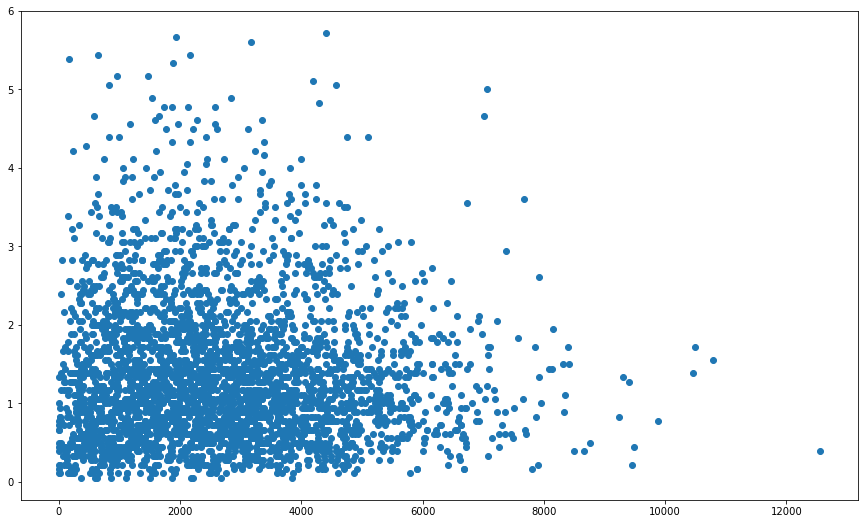

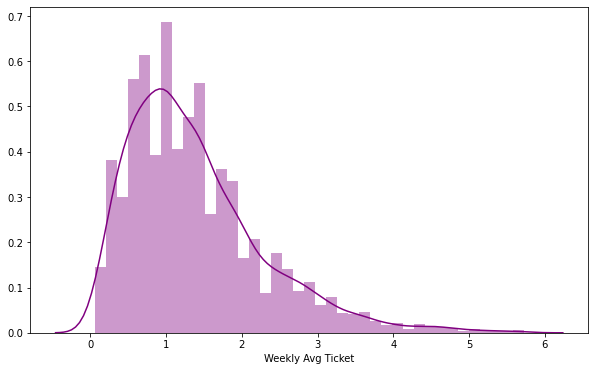

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,9))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.distplot(df["Weekly Avg Ticket"],color= "purple")
plt.show()

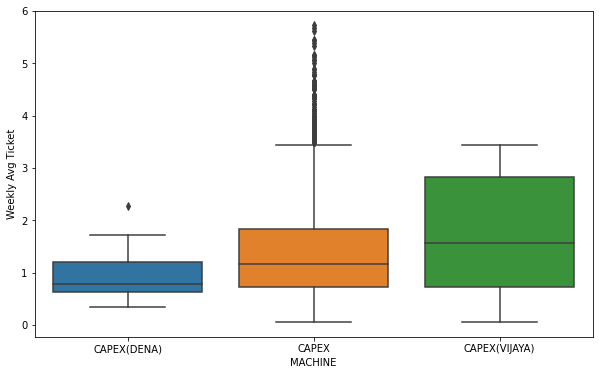

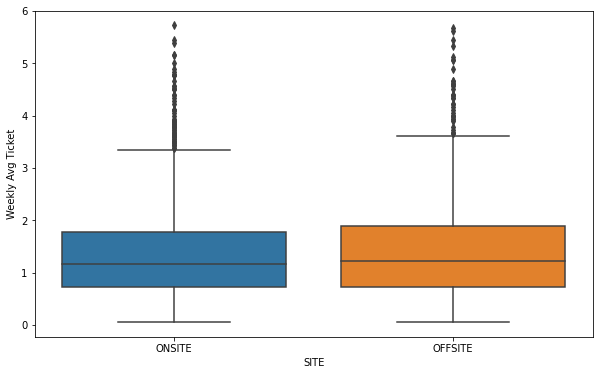

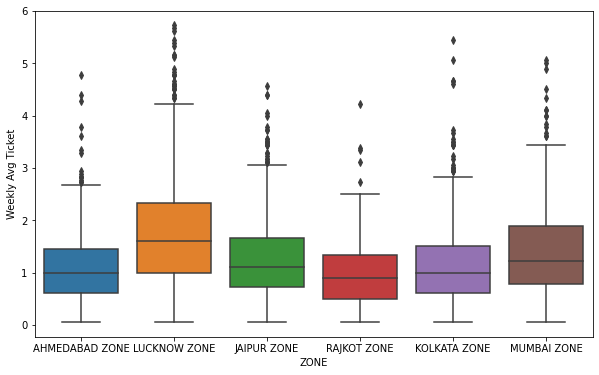

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Weekly Avg Ticket"])
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Weekly Avg Ticket"])
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Weekly Avg Ticket"])
plt.show()